In [1]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt

C:\Users\awsta\Documents\qeg-workspace\qeg-env\lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


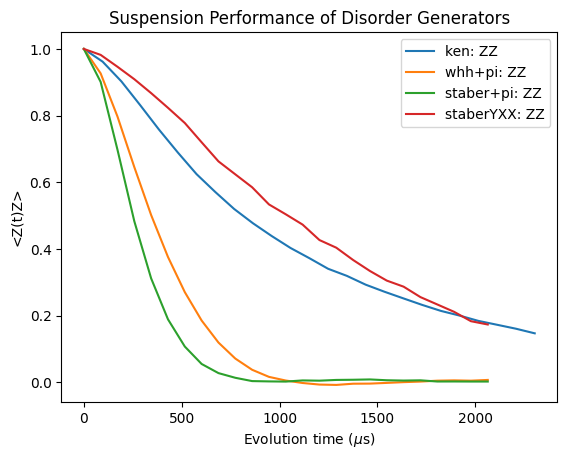

In [2]:
staber_pi = nmr.Experiment(344,folder='expt9').load_tpc(use_real=False)
whh_pi_susp_fc = nmr.Experiment(282,folder='expt9').load_tpc(use_real=False,normalize=True)
staberYXX_zz2 = nmr.Experiment(380, folder='expt9').load_tpc( use_real=False,normalize=True)
staberYXX_xx1 = nmr.Experiment(382, folder='expt9').load_tpc(use_real=False,normalize=True)
ken16_susp_fc = nmr.Experiment(279,folder='expt9').load_tpc(use_real=False,normalize=True)
t_list = np.arange(0,25*96,96)

plt.plot(t_list,ken16_susp_fc,label="ken: ZZ")
plt.plot(t_list*(43*2/96),whh_pi_susp_fc,label="whh+pi: ZZ")
plt.plot(t_list*(43*2/96),staber_pi[:25],label="staber+pi: ZZ")
plt.plot(t_list*(43*2/96),staberYXX_zz2[:25],label="staberYXX: ZZ")
#plt.plot(t_list*(43*2/96),staberYXX_xx[:25],label="staberYXX: XX")
plt.legend()
plt.xlabel(r"Evolution time ($\mu$s)")
plt.ylabel("<Z(t)Z>")
plt.title("Suspension Performance of Disorder Generators")
plt.show()


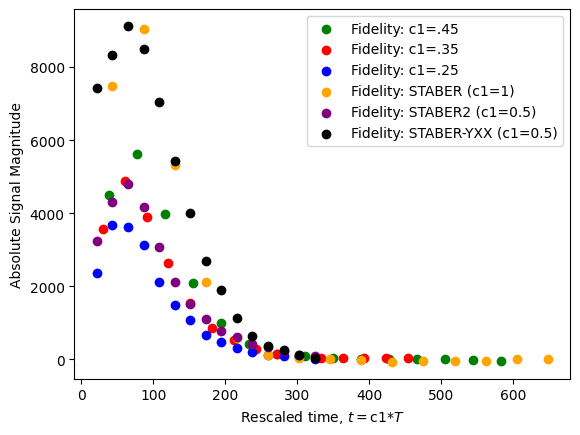

In [3]:
diz_fidelity_short_25 = nmr.Experiment(317,folder='expt9').load_tpc(use_real=False,normalize=False)
diz_fidelity_short_35 = nmr.Experiment(318,folder='expt9').load_tpc(use_real=False,normalize=False)
diz_fidelity_short_45 = nmr.Experiment(319,folder='expt9').load_tpc(use_real=False,normalize=False)
diz_staber_fid = nmr.Experiment(346,folder='expt9').load_tpc(use_real=False,normalize=False)
diz_staber2_fid = nmr.Experiment(352,folder='expt9').load_tpc(use_real=False,normalize=False)
diz_staberYXX_fid = nmr.Experiment(353,folder='expt9').load_tpc(use_real=False,normalize=False)

T = 3.6*24
times = np.arange(T, 16*T,T)
plt.scatter((.45)*times, diz_fidelity_short_45,label="Fidelity: c1=.45",marker="o",color="green")
plt.scatter((.35)*times, diz_fidelity_short_35,label="Fidelity: c1=.35",marker="o",color="red")
plt.scatter((.25)*times, diz_fidelity_short_25,label="Fidelity: c1=.25",marker="o",color="blue")
plt.scatter((1)*times/2, diz_staber_fid,label="Fidelity: STABER (c1=1)",marker="o",color="orange")
plt.scatter((0.5)*times/2, diz_staber2_fid,label="Fidelity: STABER2 (c1=0.5)",marker="o",color="purple")
plt.scatter((0.5)*times/2, diz_staberYXX_fid,label="Fidelity: STABER-YXX (c1=0.5)",marker="o",color="black")
plt.legend()
plt.xlabel(r"Rescaled time, $t =$c1*$T$")
plt.ylabel("Absolute Signal Magnitude")
plt.show()


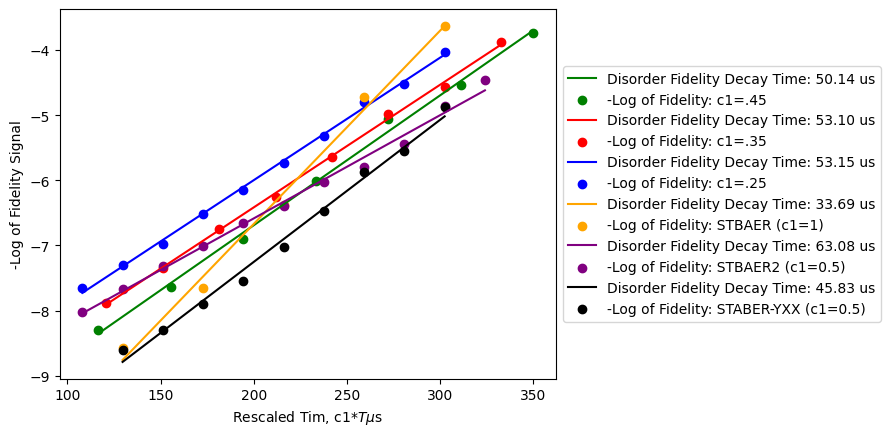

In [4]:
x=(.45)*times[2:9]
y= -np.log(diz_fidelity_short_45[2:9])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="green")
plt.scatter(x,y,label="-Log of Fidelity: c1=.45",marker="o",color="green")

x=(.35)*times[3:11]
y= -np.log(diz_fidelity_short_35[3:11])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="red")
plt.scatter(x,y,label="-Log of Fidelity: c1=.35",marker="o",color="red")

x=(.25)*times[4:14]
y= -np.log(diz_fidelity_short_25[4:14])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="blue")
plt.scatter(x,y ,label="-Log of Fidelity: c1=.25",marker="o",color="blue")

x=(1)*times[2:7]/2
y=-np.log(diz_staber_fid[2:7])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="orange")
plt.scatter(x, y,label="-Log of Fidelity: STBAER (c1=1)",marker="o",color="orange")

x=(0.5)*times[4:15]/2
y=-np.log(diz_staber2_fid[4:15])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="purple")
plt.scatter(x, y,label="-Log of Fidelity: STBAER2 (c1=0.5)",marker="o",color="purple")

x=(0.5)*times[5:14]/2
y=-np.log(diz_staberYXX_fid[5:14])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1/pz[0]),color="black")
plt.scatter(x, y,label="-Log of Fidelity: STABER-YXX (c1=0.5)",marker="o",color="black")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"Rescaled Tim, c1*$T \mu$s")
plt.ylabel("-Log of Fidelity Signal")
plt.show()

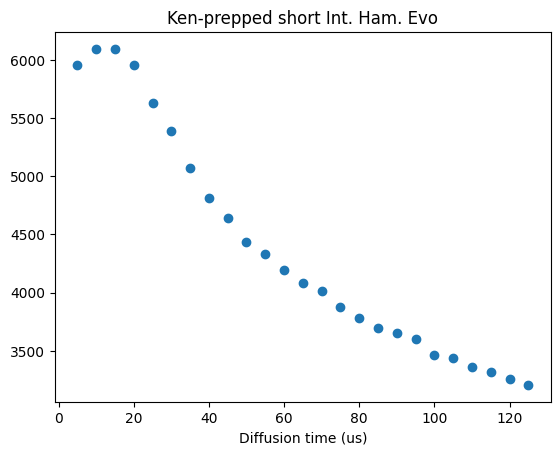

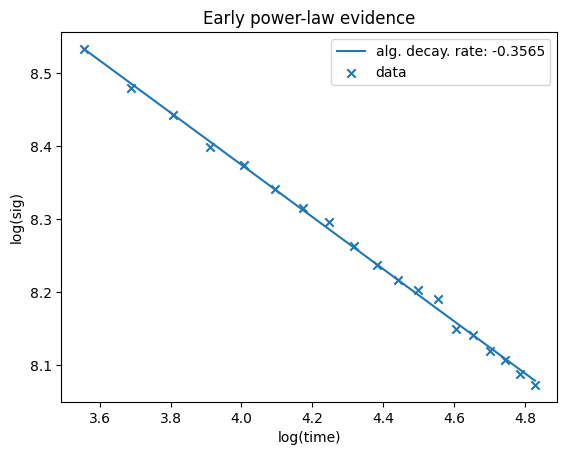

In [5]:
diff_test = nmr.Experiment(341,folder='expt9').load_tpc(use_real=False,normalize=False)
times = np.arange(5,5*26,5)
plt.scatter(times, diff_test)
plt.title("Ken-prepped short Int. Ham. Evo")
plt.xlabel("Diffusion time (us)")
plt.show()

x=np.log(times[6:])
y=np.log(diff_test)[6:]

pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("Early power-law evidence")
plt.show()

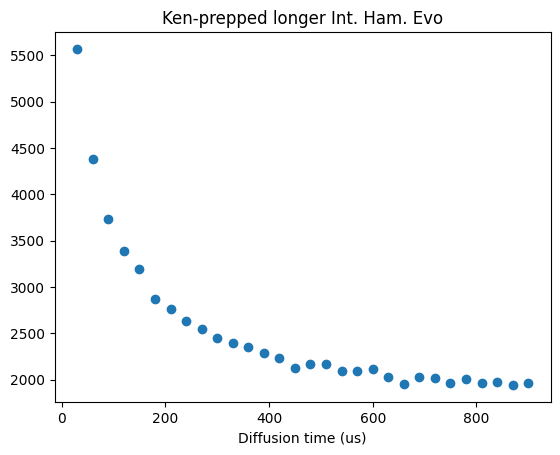

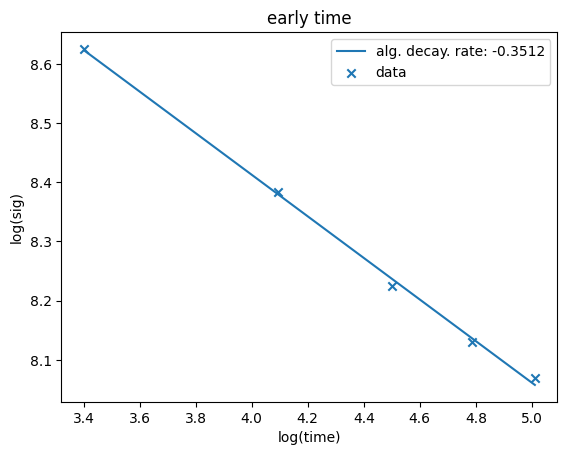

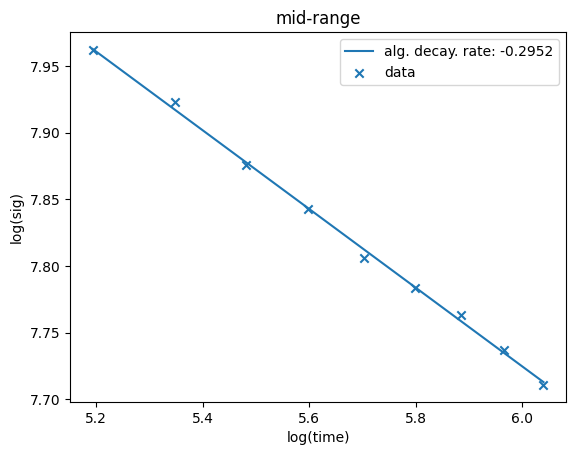

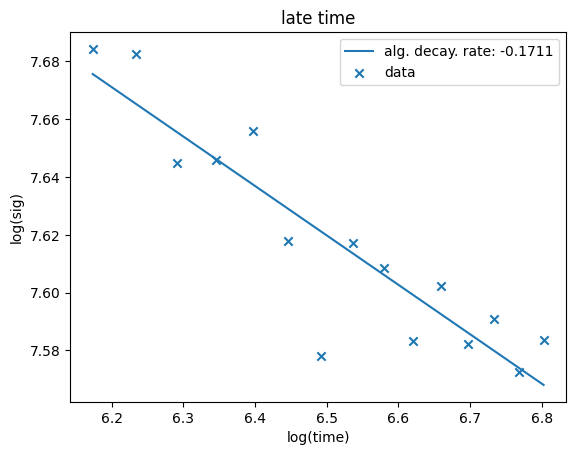

In [6]:
diff_test = nmr.Experiment(345,folder='expt9').load_tpc(use_real=False,normalize=False)
times = np.arange(30,30*31,30)

plt.scatter(times, diff_test)
plt.title("Ken-prepped longer Int. Ham. Evo")
plt.xlabel("Diffusion time (us)")
plt.show()


x=np.log(times[:5])
y=np.log(diff_test)[:5]
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("early time")
plt.show()

x=np.log(times[5:14])
y=np.log(diff_test)[5:14]
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("mid-range")
plt.show()


x=np.log(times[15:])
y=np.log(diff_test)[15:]
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]))
plt.scatter(x,y,label="data",marker='x')
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("late time")
plt.show()

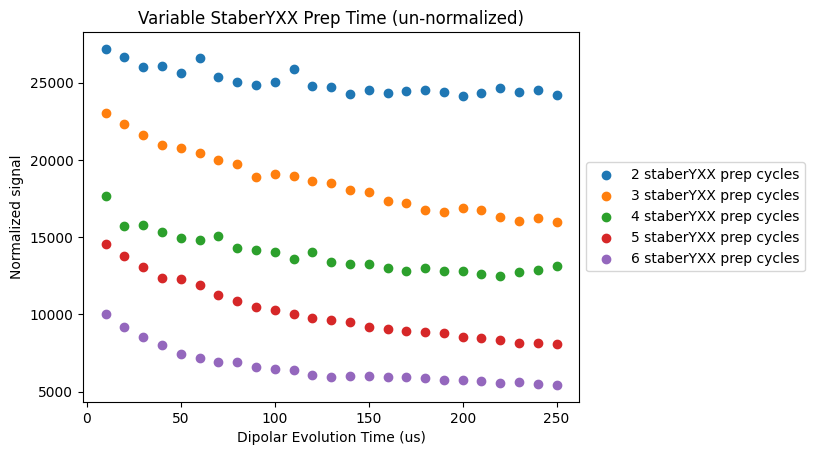

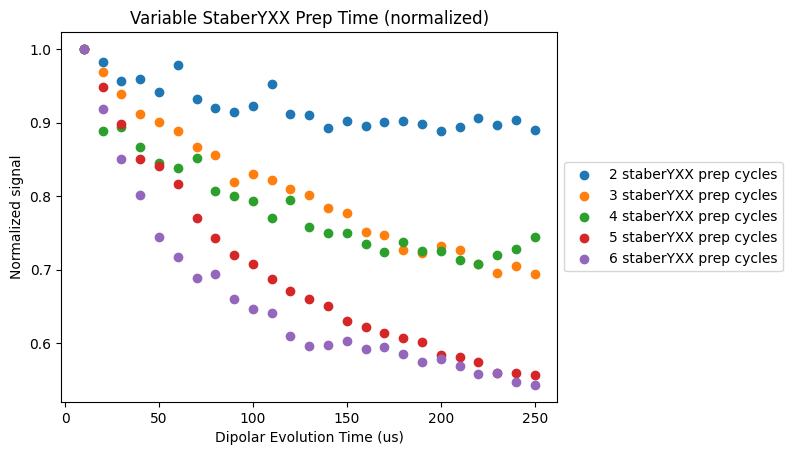

In [7]:
diffusion_varPrep = nmr.Experiment(364,folder='expt9').load_tpc3d(use_real=False,normalize=False)
times = np.arange(10,10*26,10)
for idx, sig in enumerate(diffusion_varPrep):
    plt.scatter(times, sig, label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Dipolar Evolution Time (us)")
plt.ylabel("Normalized signal")
plt.title("Variable StaberYXX Prep Time (un-normalized)")
plt.show()

diffusion_varPrep_norm = nmr.Experiment(364,folder='expt9').load_tpc3d(use_real=False,normalize=True)
for idx, sig in enumerate(diffusion_varPrep_norm):
    plt.scatter(times, sig, label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Dipolar Evolution Time (us)")
plt.ylabel("Normalized signal")
plt.title("Variable StaberYXX Prep Time (normalized)")
plt.show()

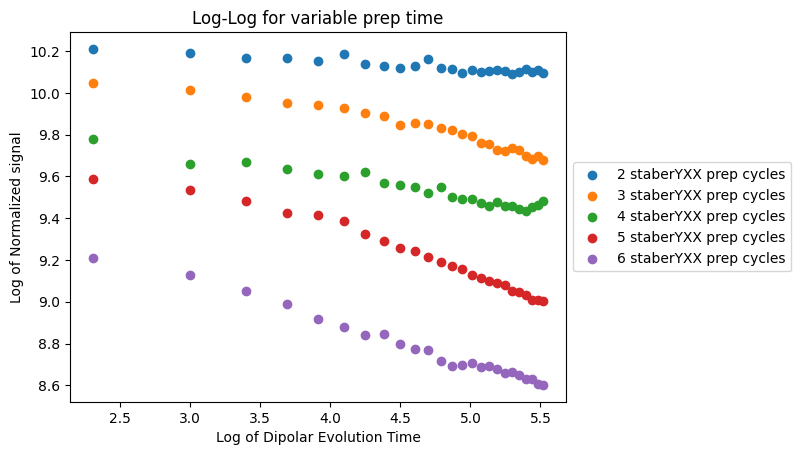

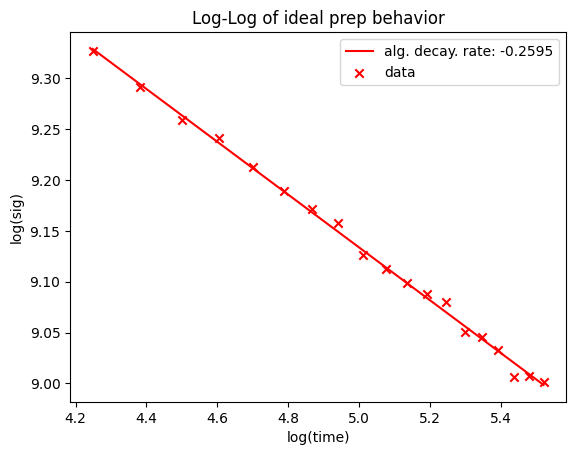

In [8]:
times = np.arange(10,10*26,10)
for idx, sig in enumerate(diffusion_varPrep):
    plt.scatter(np.log(times), np.log(sig), label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Log of Dipolar Evolution Time")
plt.ylabel("Log of Normalized signal")
plt.title("Log-Log for variable prep time")
plt.show()

diffusionRaw = diffusion_varPrep[3]
x = np.log(times[6:])
y =  np.log(diffusionRaw[6:])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="red")
plt.scatter(x,y,label="data",marker='x',color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("Log-Log of ideal prep behavior")
plt.show()

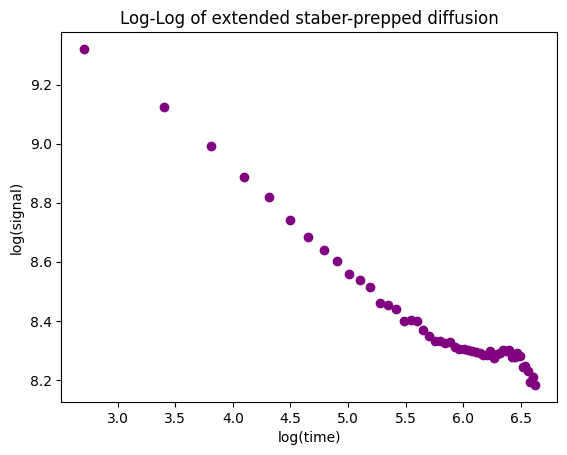

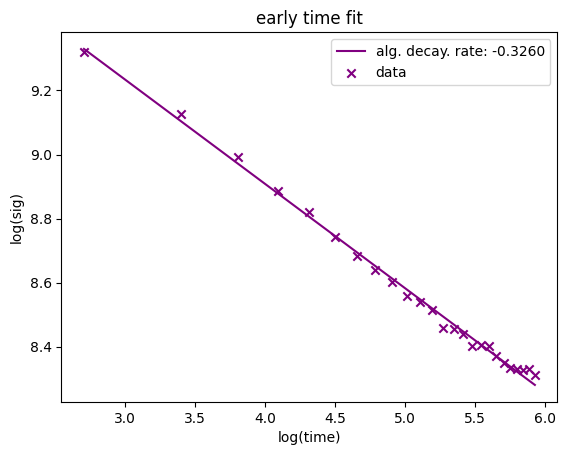

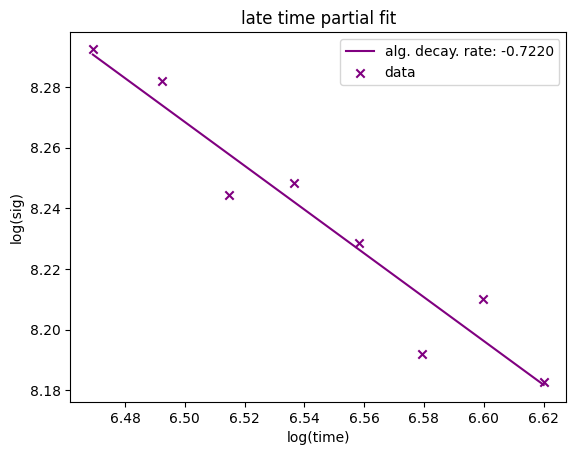

In [9]:
diff_yxx = nmr.Experiment(383,folder='expt9').load_tpc(use_real=False,normalize=False)
times = np.arange(15,15*len(diff_yxx)+15,15)
plt.scatter(np.log(times),np.log(diff_yxx),color="purple")
plt.title("Log-Log of extended staber-prepped diffusion")
plt.xlabel("log(time)")
plt.ylabel("log(signal)")
plt.show()

x = np.log(times[:25])
y =  np.log(diff_yxx[:25])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="purple")
plt.scatter(x,y,label="data",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("early time fit")
plt.show()

x = np.log(times[42:])
y =  np.log(diff_yxx[42:])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"alg. decay. rate: {:0.4f}".format(pz[0]),color="purple")
plt.scatter(x,y,label="data",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("late time partial fit")
plt.show()

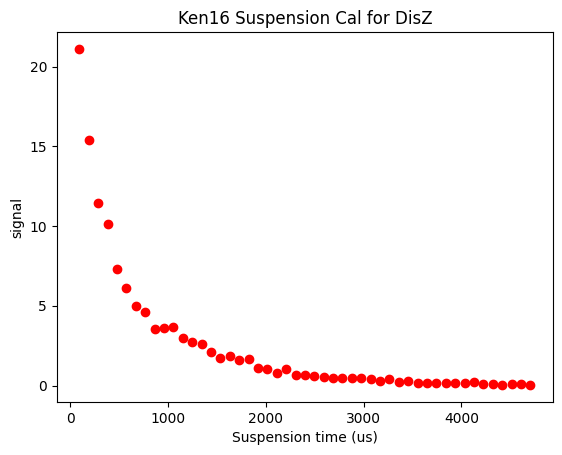

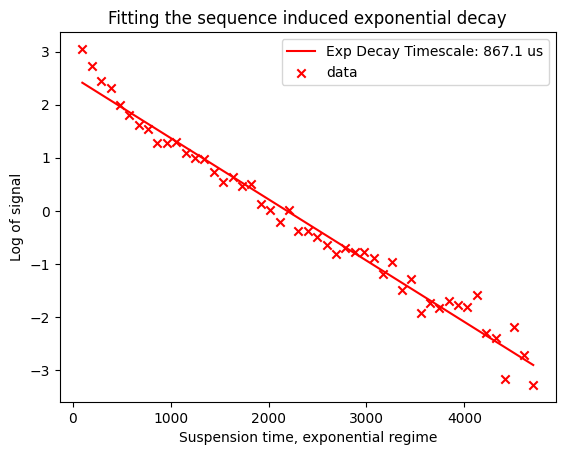

In [10]:
disZ_ken_susp = nmr.Experiment(391,folder='expt9').load_tpc(use_real=False)
times = np.arange(4*24,50*4*24,4*24)
plt.scatter(times,disZ_ken_susp[1:],color="red")
plt.xlabel("Suspension time (us)")
plt.ylabel("signal")
plt.title("Ken16 Suspension Cal for DisZ")
plt.show()

cut=0
x = times[cut:]
y =  np.log(disZ_ken_susp[cut+1:])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Exp Decay Timescale: {:0.1f} us".format(-1/pz[0]),color="red")
plt.scatter(x,y,label="data",marker='x',color="red")
plt.legend()
plt.xlabel("Suspension time, exponential regime")
plt.ylabel("Log of signal")
plt.title("Fitting the sequence induced exponential decay")
plt.show()

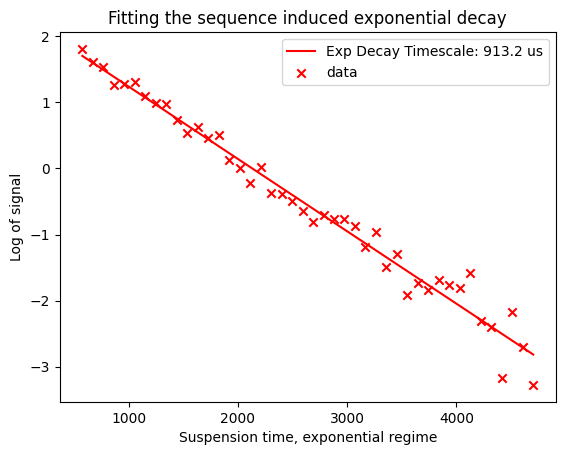

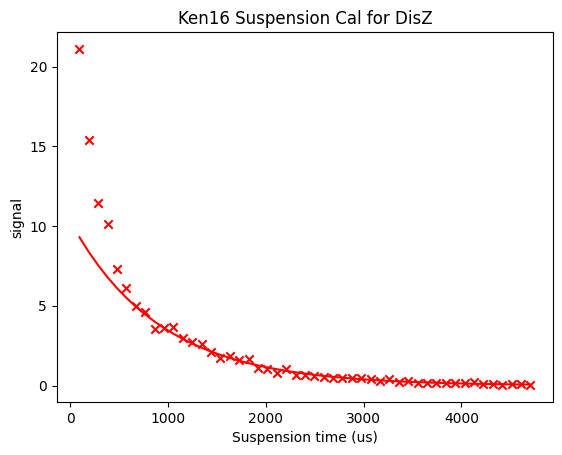

In [11]:
disZ_ken_susp = nmr.Experiment(391,folder='expt9').load_tpc(use_real=False)



cut=5
x = times[cut:]
y =  np.log(disZ_ken_susp[cut+1:])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"Exp Decay Timescale: {:0.1f} us".format(-1/pz[0]),color="red")
plt.scatter(x,y,label="data",marker='x',color="red")
plt.legend()
plt.xlabel("Suspension time, exponential regime")
plt.ylabel("Log of signal")
plt.title("Fitting the sequence induced exponential decay")
plt.show()


times = np.arange(4*24,50*4*24,4*24)
plt.scatter(times,disZ_ken_susp[1:],color="red",marker="x")
plt.plot(times, np.exp(pz[1])*np.exp((times)*pz[0]),color="red")
plt.xlabel("Suspension time (us)")
plt.ylabel("signal")
plt.title("Ken16 Suspension Cal for DisZ")
plt.show()


decay_correction = np.exp(-times*pz[0])

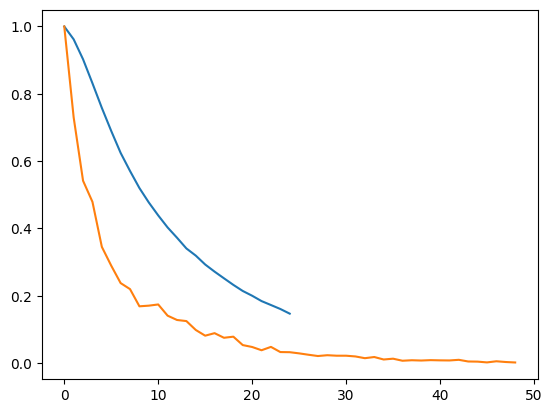

In [12]:
ken16_susp_fc = nmr.Experiment(279,folder='expt9').load_tpc(use_real=False,normalize=True)
disZ_ken_susp = nmr.Experiment(391,folder='expt9').load_tpc(use_real=False)
times = np.arange(4*24,50*4*24,4*24)

plt.plot(ken16_susp_fc)
plt.plot(disZ_ken_susp[1:]/disZ_ken_susp[1])
plt.show()

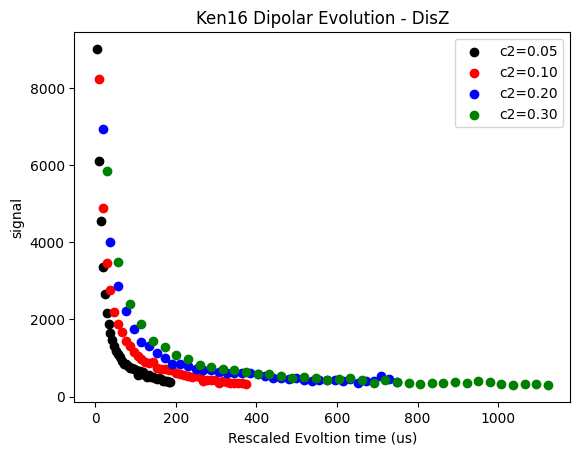

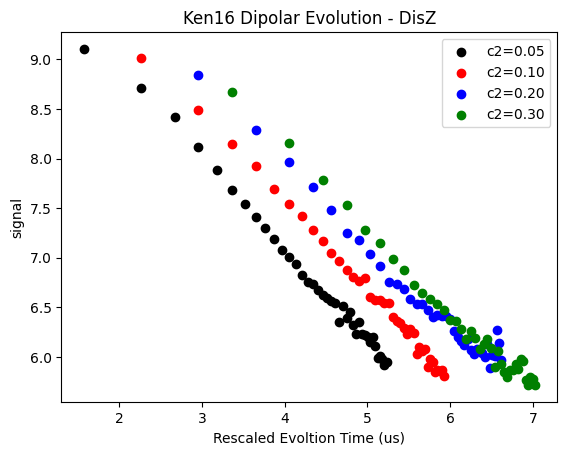

In [13]:
disZ_c2_10 = nmr.Experiment(392,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_20 = nmr.Experiment(393,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_30 = nmr.Experiment(394,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05 = nmr.Experiment(424,folder='expt9').load_tpc(use_real=False,normalize=False)


times = np.arange(4*24,40*4*24,4*24)
plt.scatter(0.05*times,disZ_c2_05[1:40],color="black",label="c2=0.05")
plt.scatter(0.1*times,disZ_c2_10[1:],color="red",label="c2=0.10")
plt.scatter(0.2*times,disZ_c2_20[1:],color="blue",label="c2=0.20")
plt.scatter(0.3*times,disZ_c2_30[1:],color="green",label="c2=0.30")
plt.xlabel("Rescaled Evoltion time (us)")
plt.ylabel("signal")
plt.title("Ken16 Dipolar Evolution - DisZ")
plt.legend()
plt.show()

plt.scatter(np.log(0.05*times),np.log(disZ_c2_05[1:40]),color="black",label="c2=0.05")
plt.scatter(np.log(0.1*times),np.log(disZ_c2_10[1:]),color="red",label="c2=0.10")
plt.scatter(np.log(0.2*times),np.log(disZ_c2_20[1:]),color="blue",label="c2=0.20")
plt.scatter(np.log(0.3*times),np.log(disZ_c2_30[1:]),color="green",label="c2=0.30")
plt.xlabel("Rescaled Evoltion Time (us)")
plt.ylabel("signal")
plt.title("Ken16 Dipolar Evolution - DisZ")
plt.legend()
plt.show()

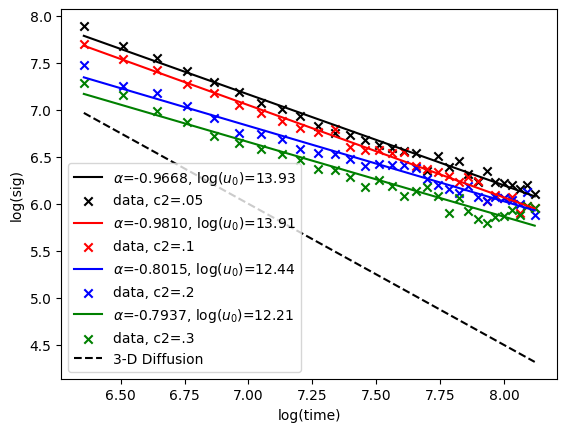

In [14]:
start=5
end=35

x = np.log(times[start:end])
y =  np.log(disZ_c2_05[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="black")
plt.scatter(x,y,label="data, c2=.05",marker='x',color="black")

x = np.log(times[start:end])
y =  np.log(disZ_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="red")
plt.scatter(x,y,label="data, c2=.1",marker='x',color="red")

x = np.log(times[start:end])
y =  np.log(disZ_c2_20[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="blue")
plt.scatter(x,y,label="data, c2=.2",marker='x',color="blue")

x = np.log(times[start:end])
y =  np.log(disZ_c2_30[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="green")
plt.scatter(x,y,label="data, c2=.3",marker='x',color="green")

plt.plot(x,-3/2*x+ 16.5,label="3-D Diffusion",color="black",linestyle="--")

plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

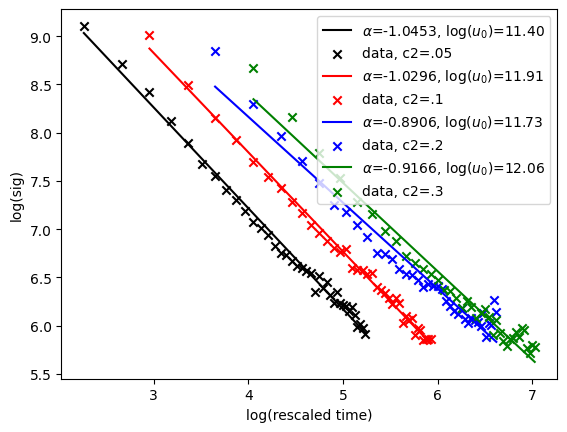

In [15]:
start=1
end=39

x = np.log(0.05*times[start:end])
y =  np.log(disZ_c2_05[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="black")
plt.scatter(x,y,label="data, c2=.05",marker='x',color="black")

x = np.log(0.1*times[start:end])
y =  np.log(disZ_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="red")
plt.scatter(x,y,label="data, c2=.1",marker='x',color="red")

x = np.log(0.2*times[start:end])
y =  np.log(disZ_c2_20[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="blue")
plt.scatter(x,y,label="data, c2=.2",marker='x',color="blue")

x = np.log(0.3*times[start:end])
y =  np.log(disZ_c2_30[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="green")
plt.scatter(x,y,label="data, c2=.3",marker='x',color="green")

plt.legend()
plt.xlabel("log(rescaled time)")
plt.ylabel("log(sig)")
plt.show()

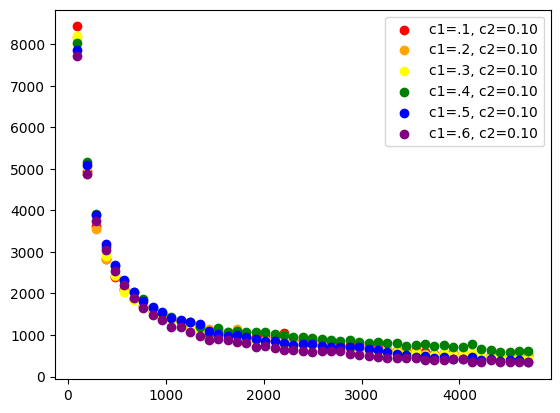

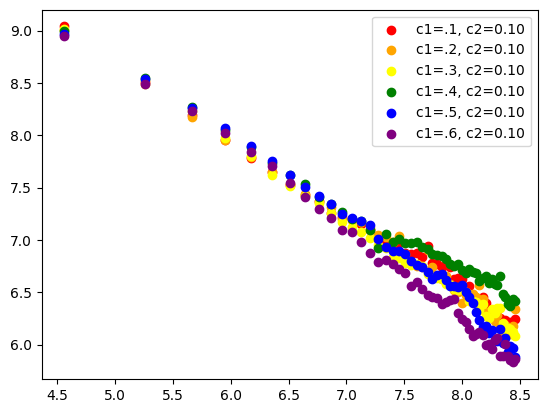

In [16]:
disZ_c1_10_c2_10 = nmr.Experiment(401,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c1_20_c2_10 = nmr.Experiment(402,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c1_30_c2_10 = nmr.Experiment(408,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c1_40_c2_10 = nmr.Experiment(409,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c1_50_c2_10 = nmr.Experiment(410,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c1_60_c2_10 = nmr.Experiment(411,folder='expt9').load_tpc(use_real=False,normalize=False)


tau = 4
T = 24*tau

times = np.arange(T,50*T,T)
plt.scatter(times,disZ_c1_10_c2_10[1:],color="red",label="c1=.1, c2=0.10")
plt.scatter(times,disZ_c1_20_c2_10[1:],color="orange",label="c1=.2, c2=0.10")
plt.scatter(times,disZ_c1_30_c2_10[1:],color="yellow",label="c1=.3, c2=0.10")
plt.scatter(times,disZ_c1_40_c2_10[1:],color="green",label="c1=.4, c2=0.10")
plt.scatter(times,disZ_c1_50_c2_10[1:],color="blue",label="c1=.5, c2=0.10")
plt.scatter(times,disZ_c1_60_c2_10[1:],color="purple",label="c1=.6, c2=0.10")

plt.legend()
plt.show()


plt.scatter(np.log(times),np.log(disZ_c1_10_c2_10[1:]),color="red",label="c1=.1, c2=0.10")
plt.scatter(np.log(times),np.log(disZ_c1_20_c2_10[1:]),color="orange",label="c1=.2, c2=0.10")
plt.scatter(np.log(times),np.log(disZ_c1_30_c2_10[1:]),color="yellow",label="c1=.3, c2=0.10")
plt.scatter(np.log(times),np.log(disZ_c1_40_c2_10[1:]),color="green",label="c1=.4, c2=0.10")
plt.scatter(np.log(times),np.log(disZ_c1_50_c2_10[1:]),color="blue",label="c1=.5, c2=0.10")
plt.scatter(np.log(times),np.log(disZ_c1_60_c2_10[1:]),color="purple",label="c1=.6, c2=0.10")

plt.legend()
plt.show()

In [17]:
decay_power_list = []

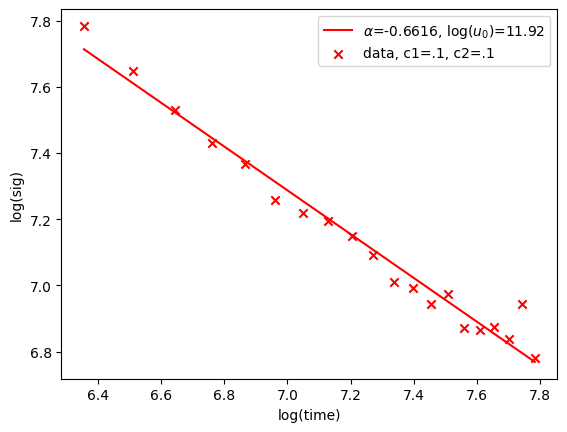

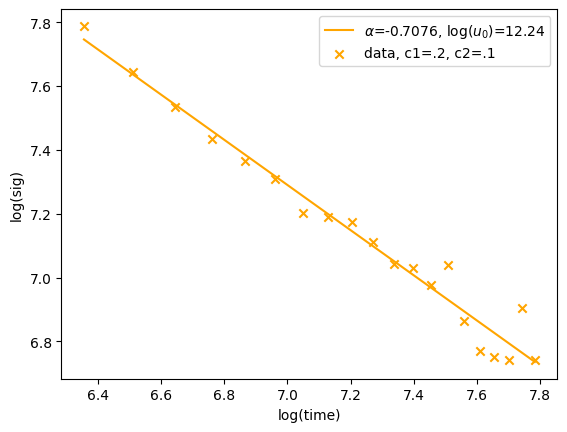

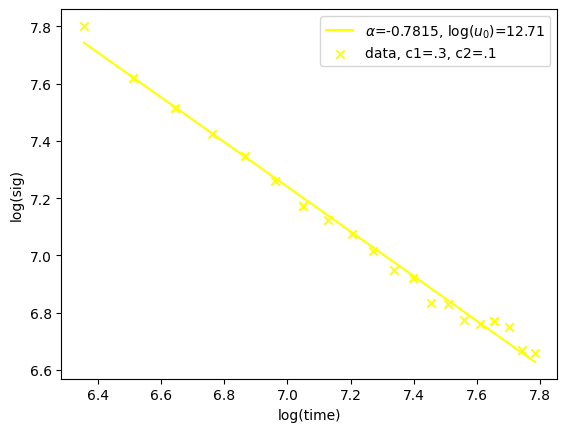

In [18]:
start=5
end=25


x = np.log(times[start:end])
y =  np.log(disZ_c1_10_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="red")
plt.scatter(x,y,label="data, c1=.1, c2=.1",marker='x',color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([.1,pz[0]])

x = np.log(times[start:end])
y =  np.log(disZ_c1_20_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="orange")
plt.scatter(x,y,label="data, c1=.2, c2=.1",marker='x',color="orange")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([.2,pz[0]])

x = np.log(times[start:end])
y =  np.log(disZ_c1_30_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="yellow")
plt.scatter(x,y,label="data, c1=.3, c2=.1",marker='x',color="yellow")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([.3,pz[0]])

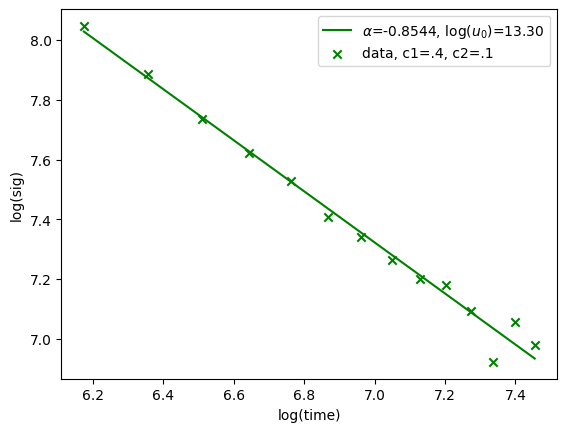

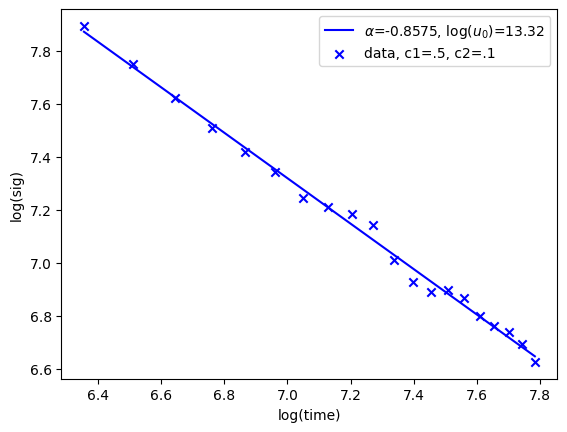

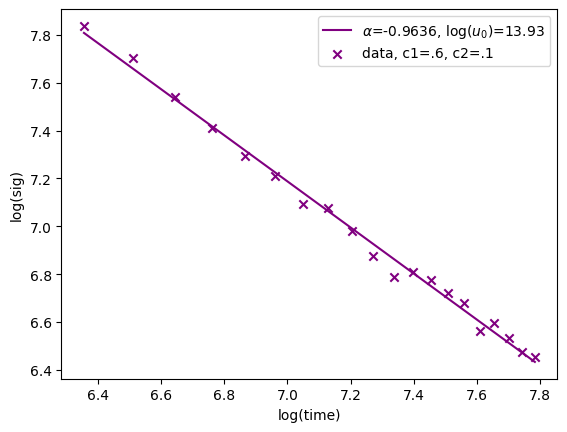

In [19]:
start=4
end=18

x = np.log(times[start:end])
y =  np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="green")
plt.scatter(x,y,label="data, c1=.4, c2=.1",marker='x',color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([.4,pz[0]])

start=5
end=25

x = np.log(times[start:end])
y =  np.log(disZ_c1_50_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="blue")
plt.scatter(x,y,label="data, c1=.5, c2=.1",marker='x',color="blue")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([.5,pz[0]])

x = np.log(times[start:end])
y =  np.log(disZ_c1_60_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="purple")
plt.scatter(x,y,label="data, c1=.6, c2=.1",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([.6,pz[0]])

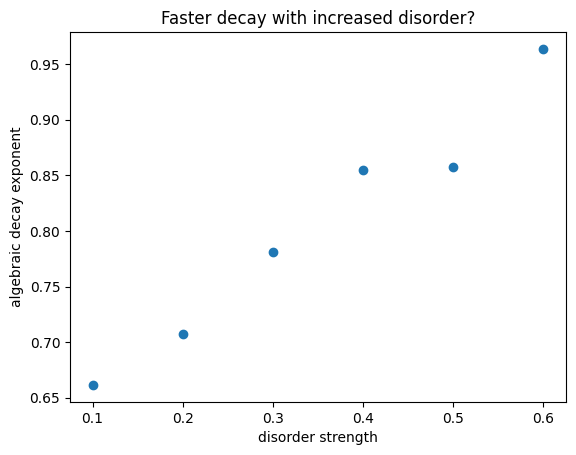

In [20]:
vals = np.array(decay_power_list).transpose()
plt.scatter(vals[0],-1*vals[1])
plt.xlabel("disorder strength")
plt.ylabel("algebraic decay exponent")
plt.title("Faster decay with increased disorder?")
plt.show()

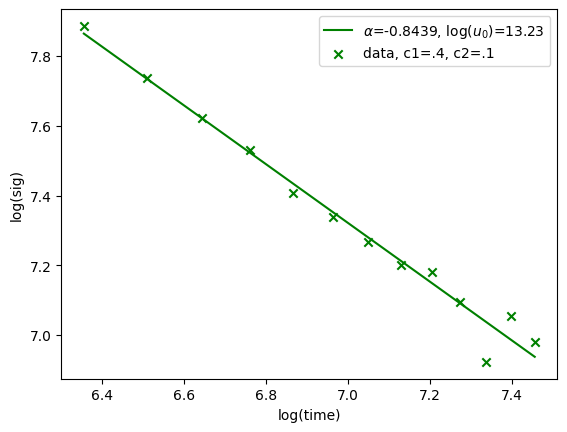

In [21]:
start=5
end=18


x = np.log(times[start:end])
y =  np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="green")
plt.scatter(x,y,label="data, c1=.4, c2=.1",marker='x',color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

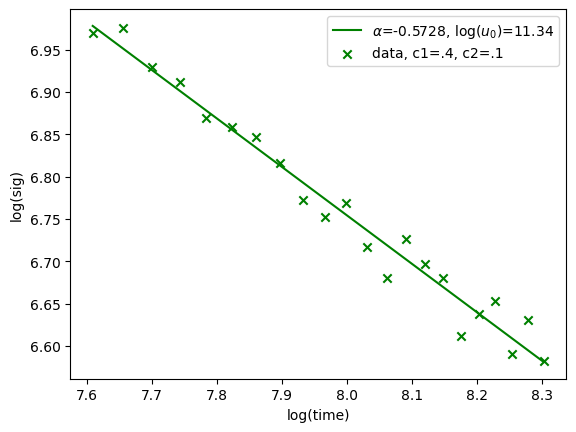

In [22]:
start=20
end=42


x = np.log(times[start:end])
y =  np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="green")
plt.scatter(x,y,label="data, c1=.4, c2=.1",marker='x',color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

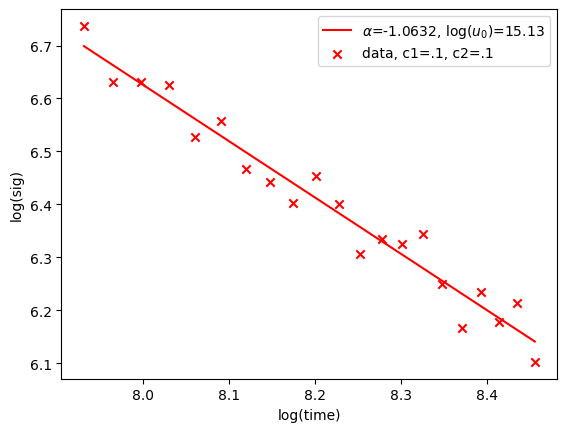

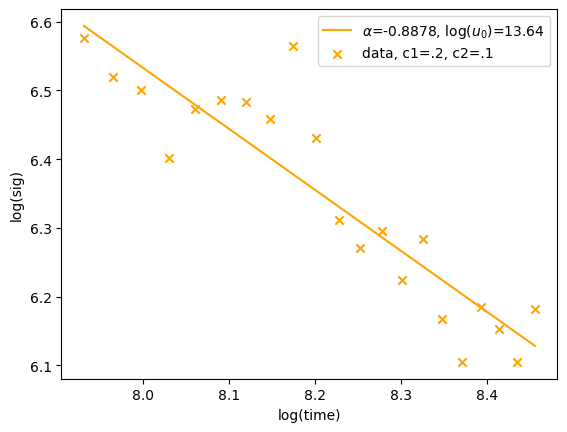

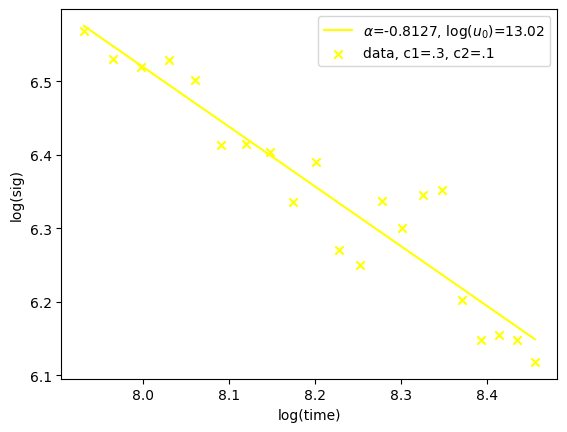

In [23]:
start=28
end=49

x = np.log(times[start:end])
y =  np.log(disZ_c1_10_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="red")
plt.scatter(x,y,label="data, c1=.1, c2=.1",marker='x',color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y =  np.log(disZ_c1_20_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="orange")
plt.scatter(x,y,label="data, c1=.2, c2=.1",marker='x',color="orange")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y =  np.log(disZ_c1_30_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="yellow")
plt.scatter(x,y,label="data, c1=.3, c2=.1",marker='x',color="yellow")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

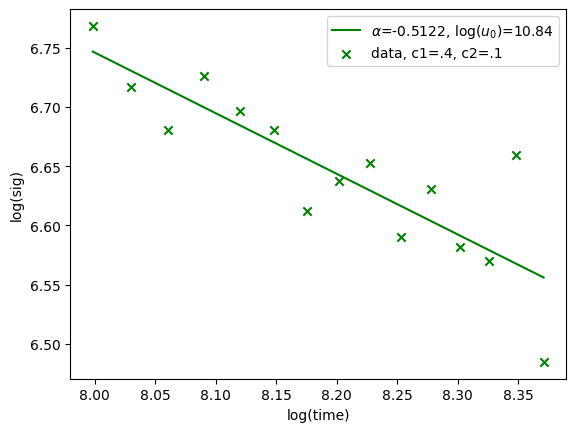

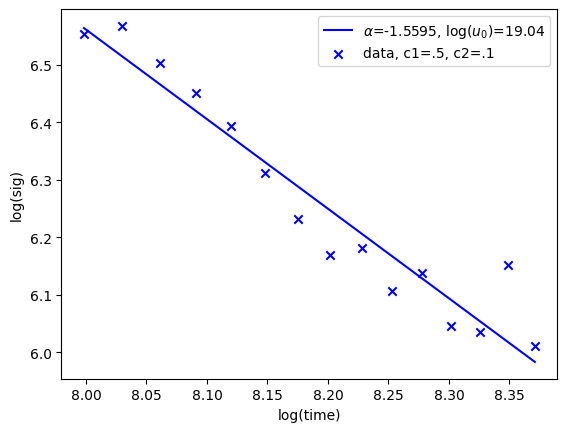

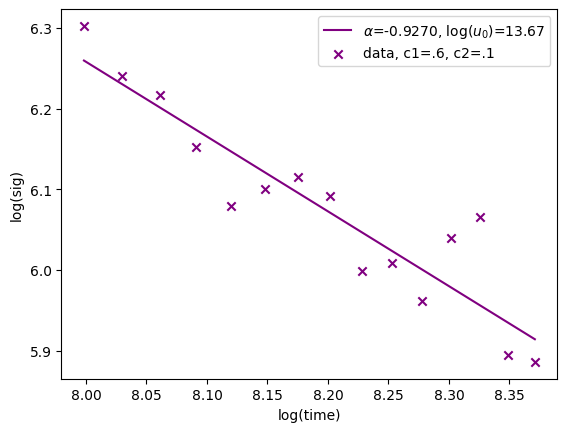

In [24]:
start=30
end=45

x = np.log(times[start:end])
y =  np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="green")
plt.scatter(x,y,label="data, c1=.4, c2=.1",marker='x',color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y =  np.log(disZ_c1_50_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="blue")
plt.scatter(x,y,label="data, c1=.5, c2=.1",marker='x',color="blue")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y =  np.log(disZ_c1_60_c2_10[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="purple")
plt.scatter(x,y,label="data, c1=.6, c2=.1",marker='x',color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

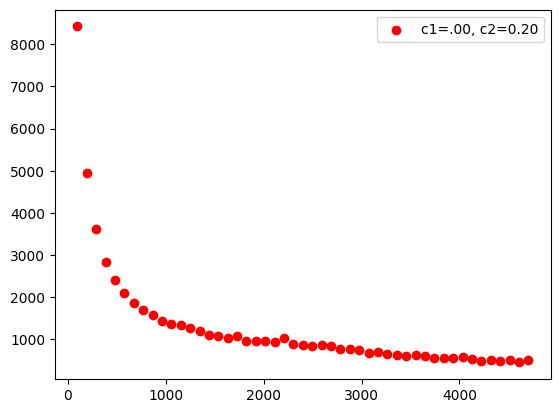

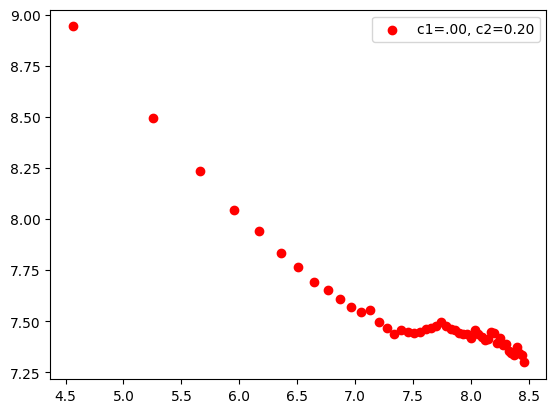

In [25]:
disZ_c1_00_c2_20 = nmr.Experiment(417,folder='expt9').load_tpc(use_real=False,normalize=False)



tau = 4
T = 24*tau

times = np.arange(T,50*T,T)
plt.scatter(times,disZ_c1_10_c2_10[1:],color="red",label="c1=.00, c2=0.20")
#plt.scatter(times,disZ_c1_20_c2_10[1:],color="orange",label="c1=.2, c2=0.10")
#plt.scatter(times,disZ_c1_30_c2_10[1:],color="yellow",label="c1=.3, c2=0.10")
#plt.scatter(times,disZ_c1_40_c2_10[1:],color="green",label="c1=.4, c2=0.10")
#plt.scatter(times,disZ_c1_50_c2_10[1:],color="blue",label="c1=.5, c2=0.10")
#plt.scatter(times,disZ_c1_60_c2_10[1:],color="purple",label="c1=.6, c2=0.10")

plt.legend()
plt.show()


plt.scatter(np.log(times),np.log(disZ_c1_00_c2_20[1:]),color="red",label="c1=.00, c2=0.20")
#plt.scatter(np.log(times),np.log(disZ_c1_20_c2_10[1:]),color="orange",label="c1=.2, c2=0.10")
#plt.scatter(np.log(times),np.log(disZ_c1_30_c2_10[1:]),color="yellow",label="c1=.3, c2=0.10")
#plt.scatter(np.log(times),np.log(disZ_c1_40_c2_10[1:]),color="green",label="c1=.4, c2=0.10")
#plt.scatter(np.log(times),np.log(disZ_c1_50_c2_10[1:]),color="blue",label="c1=.5, c2=0.10")
#plt.scatter(np.log(times),np.log(disZ_c1_60_c2_10[1:]),color="purple",label="c1=.6, c2=0.10")

plt.legend()
plt.show()

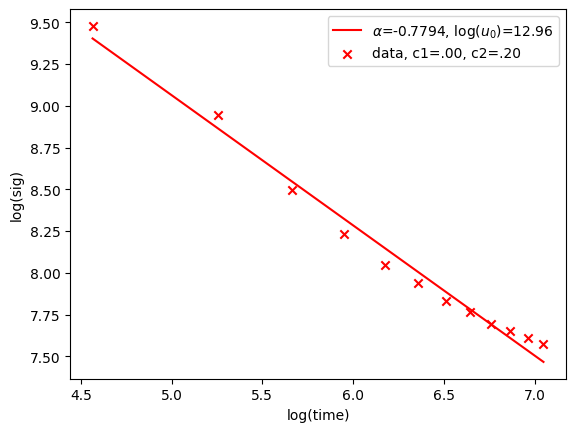

In [26]:
start=0
end=12


x = np.log(times[start:end])
y =  np.log(disZ_c1_00_c2_20[start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="red")
plt.scatter(x,y,label="data, c1=.00, c2=.20",marker='x',color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

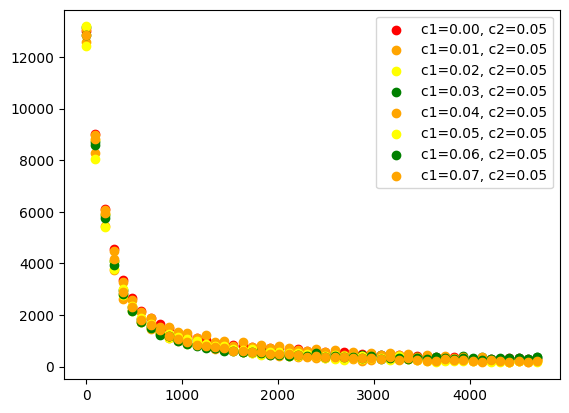

C:\Users\awsta\AppData\Local\Temp\ipykernel_42604\4223465422.py:44: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(times),np.log(disZ_c2_05),color="red",label="c1=0.00, c2=0.05")
C:\Users\awsta\AppData\Local\Temp\ipykernel_42604\4223465422.py:45: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(times),np.log(disZ_c2_05_c1_01),color="orange",label="c1=0.01, c2=0.05")
C:\Users\awsta\AppData\Local\Temp\ipykernel_42604\4223465422.py:46: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(times),np.log(disZ_c2_05_c1_02),color="yellow",label="c1=0.02, c2=0.05")
C:\Users\awsta\AppData\Local\Temp\ipykernel_42604\4223465422.py:47: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(times),np.log(disZ_c2_05_c1_03),color="green",label="c1=0.03, c2=0.05")
C:\Users\awsta\AppData\Local\Temp\ipykernel_42604\4223465422.py:48: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(times),np.log(disZ_c2_0

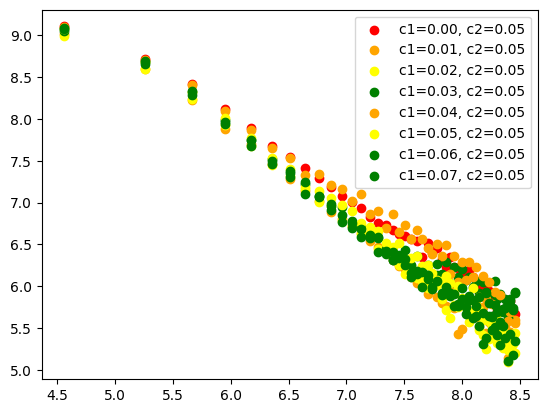

In [27]:
disZ_c2_05 = nmr.Experiment(424,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_01 = nmr.Experiment(427,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_02 = nmr.Experiment(428,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_03 = nmr.Experiment(435,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_04 = nmr.Experiment(436,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_05 = nmr.Experiment(437,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_06 = nmr.Experiment(438,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_07 = nmr.Experiment(444,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_30 = nmr.Experiment(451,folder='expt9').load_tpc(use_real=False,normalize=False)
disZ_c2_05_c1_60 = nmr.Experiment(452,folder='expt9').load_tpc(use_real=False,normalize=False)


data = {}
data[np.sqrt(0)/.05] = nmr.Experiment(424,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(.01)/.05] = nmr.Experiment(427,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(.02)/.05] = nmr.Experiment(428,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(.03)/.05] = nmr.Experiment(435,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(0.04)/.05] = nmr.Experiment(436,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(0.04001)/.05] = nmr.Experiment(453,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(0.05)/.05] = nmr.Experiment(437,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(0.06)/.05] = nmr.Experiment(438,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(0.07)/.05] = nmr.Experiment(444,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(0.30)/.05] =  nmr.Experiment(451,folder='expt9').load_tpc(use_real=False,normalize=False)
data[np.sqrt(0.60)/.05] =  nmr.Experiment(452,folder='expt9').load_tpc(use_real=False,normalize=False)

tau = 4
T = 24*tau

times = np.arange(0,50*T,T)
plt.scatter(times,disZ_c2_05,color="red",label="c1=0.00, c2=0.05")
plt.scatter(times,disZ_c2_05_c1_01,color="orange",label="c1=0.01, c2=0.05")
plt.scatter(times,disZ_c2_05_c1_02,color="yellow",label="c1=0.02, c2=0.05")
plt.scatter(times,disZ_c2_05_c1_03,color="green",label="c1=0.03, c2=0.05")
plt.scatter(times,disZ_c2_05_c1_04,color="orange",label="c1=0.04, c2=0.05")
plt.scatter(times,disZ_c2_05_c1_05,color="yellow",label="c1=0.05, c2=0.05")
plt.scatter(times,disZ_c2_05_c1_06,color="green",label="c1=0.06, c2=0.05")
plt.scatter(times,disZ_c2_05_c1_07,color="orange",label="c1=0.07, c2=0.05")


plt.legend()
plt.show()


plt.scatter(np.log(times),np.log(disZ_c2_05),color="red",label="c1=0.00, c2=0.05")
plt.scatter(np.log(times),np.log(disZ_c2_05_c1_01),color="orange",label="c1=0.01, c2=0.05")
plt.scatter(np.log(times),np.log(disZ_c2_05_c1_02),color="yellow",label="c1=0.02, c2=0.05")
plt.scatter(np.log(times),np.log(disZ_c2_05_c1_03),color="green",label="c1=0.03, c2=0.05")
plt.scatter(np.log(times),np.log(disZ_c2_05_c1_04),color="orange",label="c1=0.04, c2=0.05")
plt.scatter(np.log(times),np.log(disZ_c2_05_c1_05),color="yellow",label="c1=0.05, c2=0.05")
plt.scatter(np.log(times),np.log(disZ_c2_05_c1_06),color="green",label="c1=0.06, c2=0.05")
plt.scatter(np.log(times),np.log(disZ_c2_05_c1_07),color="green",label="c1=0.07, c2=0.05")

plt.legend()
plt.show()


In [44]:
test = nmr.Experiment(461,folder='expt9').load_tpc3d(use_real=False,normalize=True)

data10 = {}
data10[.04/.1] = test[0]
data10[.06/.1] = test[1]
data10[.08/.1] = test[2]

expt_3d_c208 = nmr.Experiment(473,folder='expt9').load_tpc3d(use_real=False,normalize=False)
data08 = {}
c1_vals = [0,0.02,.04,.06,.07,.08,.09,.1]
c2=.08
for c1, series in zip(c1_vals, expt_3d_c208):
    data08[np.sqrt(c1)/c2] = series

expt_3d_c208pt2 = nmr.Experiment(486,folder='expt9').load_tpc3d(use_real=False,normalize=False)
data08pt2 = {}
c1_vals = [.9,.10,.11,.12,.13,.2,.3,.4]
c2=.08
for c1, series in zip(c1_vals, expt_3d_c208pt2):
    data08pt2[np.sqrt(c1)/c2] = series

expt_3d_c208pt3 = nmr.Experiment(496,folder='expt9').load_tpc3d(use_real=False,normalize=False)
data08pt3 = {}
c1_vals = [.07,.08,.09,.10,.11]
c2=.08
for c1, series in zip(c1_vals, expt_3d_c208pt3):
    data08pt3[np.sqrt(c1)/c2] = series

#expt_3d_c208 = nmr.Experiment(478,folder='expt9').load_tpc3d(use_real=False,normalize=True)
#c1_vals = [.11,.12,.13,.14,.15,.2,.3,.4]
#for c1, series in zip(c1_vals, expt_3d_c208):
#    data08[np.sqrt(c1)/c2] = series

In [45]:
import statsmodels.api as sm

def slope_extraction(time,data,start,end,ylabel='Slope',xlabel='dependent var',labelstr=''):
    slopes = []
    dependent = []
    errs = []
    for key, val in data.items():
        x=np.log(time[start:end])
        X=sm.add_constant(x)
        y=-np.log(val[start:end])
        ols = sm.OLS(y, X)
        ols_result = ols.fit()
        dependent.append(key)
        slopes.append(ols_result.params[1])
        errs.append(ols_result.conf_int()[1,1]-ols_result.params[1])

    #plt.scatter(dependent, slopes,label='Fit w/ 95% C.I. ' + labelstr)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Fitted Dynamical Exponent, Variable Disorder')
    plt.errorbar(dependent, slopes, yerr=errs,linestyle='',marker='o',label='Fit w/ 95% C.I. ' + labelstr)


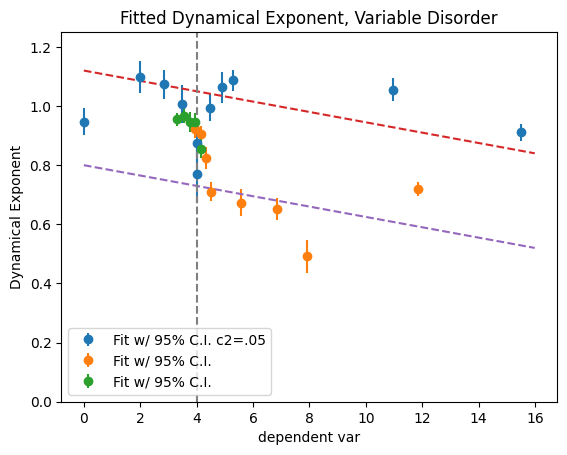

In [52]:
slope_extraction(times,data,5,25,ylabel='Dynamical Exponent',labelstr='c2=.05')
#slope_extraction(times,data08,2,25,ylabel='Dynamical Exponent',labelstr='c2=.08',xlabel='Disorder to Interaction Ratio')
slope_extraction(times,data08pt2,2,25,ylabel='Dynamical Exponent')
slope_extraction(times,data08pt3,2,25,ylabel='Dynamical Exponent')
dis_range = np.arange(0,16,.01)
plt.plot(dis_range, -.0175*dis_range+1.12,linestyle="--")
plt.plot(dis_range, -.0175*dis_range+0.8,linestyle="--")
plt.ylim([0,1.25])
#plt.xlim([-.1,6])
plt.vlines(4,0,1.5,linestyle='--',color='grey')
plt.legend()
plt.show()

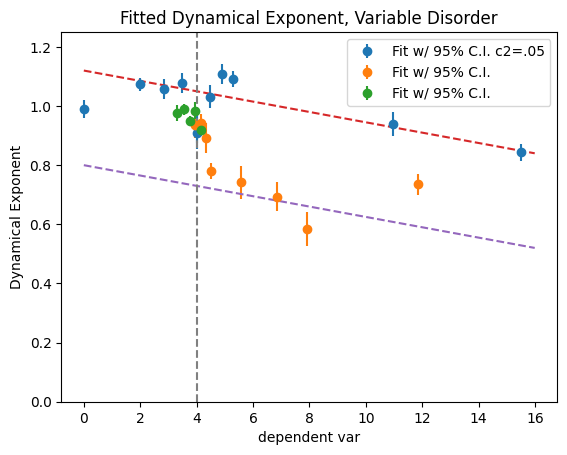

In [53]:
slope_extraction(times,data,2,15,ylabel='Dynamical Exponent',labelstr='c2=.05')
#slope_extraction(times,data08,2,25,ylabel='Dynamical Exponent',labelstr='c2=.08',xlabel='Disorder to Interaction Ratio')
slope_extraction(times,data08pt2,2,15,ylabel='Dynamical Exponent')
slope_extraction(times,data08pt3,2,15,ylabel='Dynamical Exponent')
dis_range = np.arange(0,16,.01)
plt.plot(dis_range, -.0175*dis_range+1.12,linestyle="--")
plt.plot(dis_range, -.0175*dis_range+0.8,linestyle="--")
plt.ylim([0,1.25])
#plt.xlim([-.1,6])
plt.vlines(4,0,1.5,linestyle='--',color='grey')
plt.legend()
plt.show()

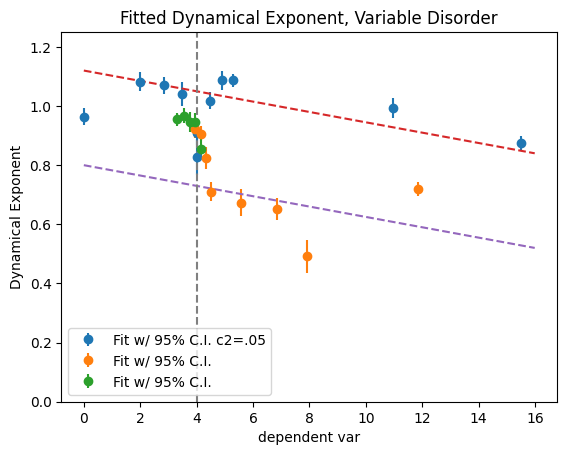

In [54]:
slope_extraction(times,data,2,25,ylabel='Dynamical Exponent',labelstr='c2=.05')
#slope_extraction(times,data08,2,25,ylabel='Dynamical Exponent',labelstr='c2=.08',xlabel='Disorder to Interaction Ratio')
slope_extraction(times,data08pt2,2,25,ylabel='Dynamical Exponent')
slope_extraction(times,data08pt3,2,25,ylabel='Dynamical Exponent')
dis_range = np.arange(0,16,.01)
plt.plot(dis_range, -.0175*dis_range+1.12,linestyle="--")
plt.plot(dis_range, -.0175*dis_range+0.8,linestyle="--")
plt.ylim([0,1.25])
#plt.xlim([-.1,6])
plt.vlines(4,0,1.5,linestyle='--',color='grey')
plt.legend()
plt.show()

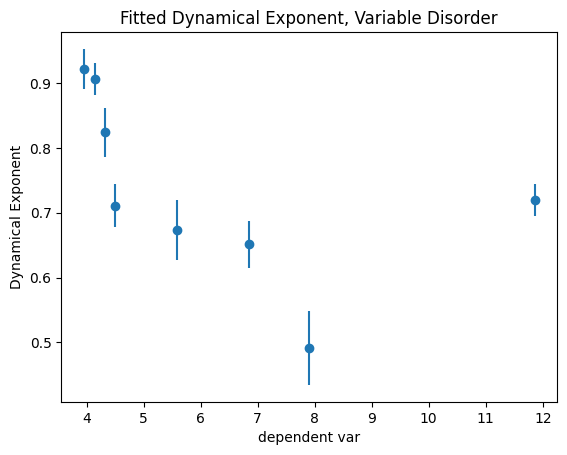

In [40]:
slope_extraction(times,data08pt2,2,25,ylabel='Dynamical Exponent')

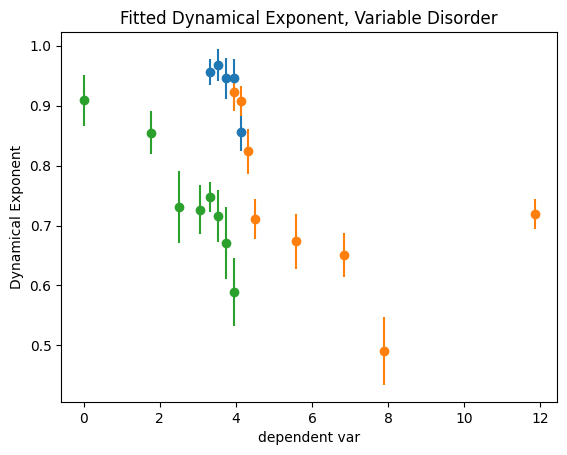

In [48]:
slope_extraction(times,data08pt3,2,25,ylabel='Dynamical Exponent')
slope_extraction(times,data08pt2,2,25,ylabel='Dynamical Exponent')
slope_extraction(times,data08,2,25,ylabel='Dynamical Exponent')

In [33]:
data.keys()

dict_keys([0.0, 2.0, 2.82842712474619, 3.4641016151377544, 4.0, 4.000499968753905, 4.472135954999579, 4.898979485566356, 5.291502622129181, 10.95445115010332, 15.491933384829668])

In [34]:
data08.keys()

dict_keys([0.0, 1.7677669529663687, 2.5, 3.0618621784789726, 3.3071891388307386, 3.5355339059327373, 3.75, 3.952847075210474])

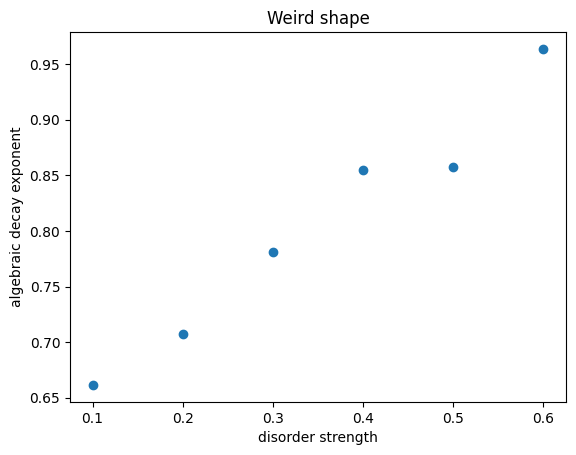

In [35]:
vals = np.array(decay_power_list).transpose()
plt.scatter(vals[0],-1*vals[1])
plt.xlabel("disorder strength")
plt.ylabel("algebraic decay exponent")
plt.title("Weird shape")
plt.show()

In [36]:
test = nmr.Experiment(461,folder='expt9').load_tpc3d(use_real=False,normalize=True)

data10 = {}
data10[.1/.04] = test[0]
data10[.1/.06] = test[1]
data10[.1/.08] = test[2]

expt_3d_c208 = nmr.Experiment(473,folder='expt9').load_tpc3d(use_real=False,normalize=True)
data08 = {}
c1_vals = [0,0.02,.04,.06,.07,.08,.09,.1]
c2=.08
for c1, series in zip(c1_vals, expt_3d_c208):
    data08[c1/c2] = series

C:\Users\awsta\Documents\qeg-workspace\qeg-env\lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


In [37]:
start=2
end=25
x = np.log(times[start:end])
y =  np.log( data[.04/.05][start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="green")
plt.scatter(x,y,label="data, c1=0.04, c2=0.1",marker='x',color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

KeyError: 0.7999999999999999

In [ ]:
start=2
end=20


x = np.log(times[start:end])
y =  np.log(data08[.1/.08][start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="red")
plt.scatter(x,y,label="data, c1=.00, c2=.20",marker='x',color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

In [ ]:
start=5
end=25


x = np.log(times[start:end])
y =  np.log(data08pt2[np.sqrt(.2)/.08][start:end])
pz = np.polyfit(x,y, 1)
plt.plot(x, x*pz[0] + pz[1],label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0],pz[1]),color="red")
plt.scatter(x,y,label="data, c1=.00, c2=.20",marker='x',color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
np.sqrt(.1)/.08